<a href="https://colab.research.google.com/github/ritiksharmasde/Deep_Learning/blob/main/ORBIT_PREDICTION_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.8307 - val_loss: 0.6397
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2240 - val_loss: 0.0877
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0416 - val_loss: 0.0772
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0324 - val_loss: 0.0734
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0291 - val_loss: 0.0558
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0233 - val_loss: 0.0540
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0182 - val_loss: 0.0501
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0130 - val_loss: 0.0571
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - val_loss: 0.0504
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 0.0561
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - val_loss: 0.0552
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021 - val_l

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

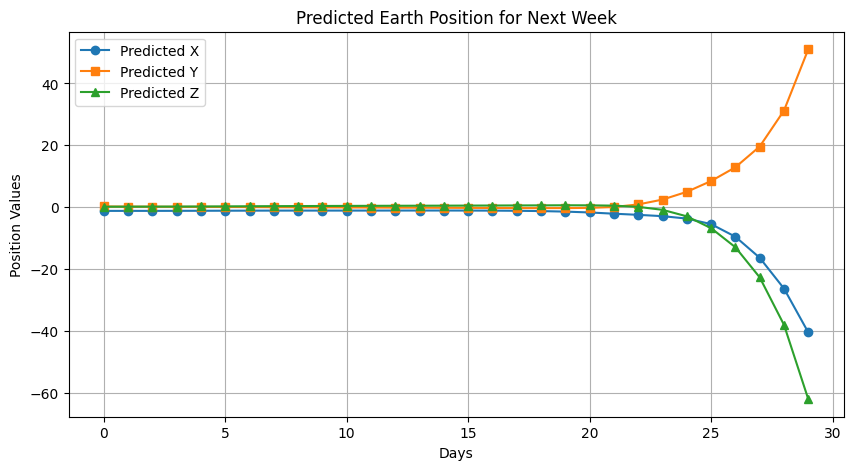

In [29]:
# 📌 Step 1: Install & Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
from sklearn.preprocessing import StandardScaler
import os
import shutil

# 📌 Step 2: Upload & Load Pre-Scaled CSV
file_path = "ONEYEAR_EARTH_SCALED.CSV"
df = pd.read_csv(file_path)

# 📌 Step 3: Data Preprocessing
features = ['X', 'Y', 'Z', 'VX', 'VY', 'VZ']
target = ['X', 'Y', 'Z', 'VX', 'VY', 'VZ']

# Scale the data
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

sequence_length = 7
X_data, y_data = [], []

for i in range(len(df_scaled) - sequence_length):
    X_data.append(df_scaled[features].iloc[i:i+sequence_length].values)
    y_data.append(df_scaled[target].iloc[i+sequence_length].values)

X_data, y_data = np.array(X_data), np.array(y_data)

# Train-Test Split (80-20)
split_idx = int(len(X_data) * 0.8)
X_train, X_test = X_data[:split_idx], X_data[split_idx:]
y_train, y_test = y_data[:split_idx], y_data[split_idx:]

# 📌 Step 4: Build & Train LSTM Model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))),
    LSTM(32, activation='relu'),
    Dense(6)  # Predicting X, Y, Z, VX, VY, VZ
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# 📌 Step 5: Predict Future Position (Next 7 Days)
future_X = X_test[-1].reshape(1, sequence_length, len(features))
future_predictions = []

for _ in range(30):
    pred = model.predict(future_X)[0]
    future_predictions.append(pred)

    future_X = np.roll(future_X, -1, axis=1)
    future_X[0, -1, :] = pred  # Correctly update last step

# Convert predictions to DataFrame
pred_df = pd.DataFrame(future_predictions, columns=['Pred_X', 'Pred_Y', 'Pred_Z','Pred_VX','Pred_VY','Pred_VZ'])
pred_df.to_csv('Earth_Next_Week_Predictions.csv', index=False)

# 📌 Step 6: Download CSV
if 'google.colab' in str(get_ipython()):
    files.download('Earth_Next_Week_Predictions.csv')
else:
    shutil.move("Earth_Next_Week_Predictions.csv", os.path.expanduser("~/Downloads/"))

# 📌 Step 7: Plot Predictions
plt.figure(figsize=(10, 5))
plt.plot(pred_df['Pred_X'], label='Predicted X', marker='o')
plt.plot(pred_df['Pred_Y'], label='Predicted Y', marker='s')
plt.plot(pred_df['Pred_Z'], label='Predicted Z', marker='^')
plt.legend()
plt.title('Predicted Earth Position for Next Week')
plt.xlabel('Days')
plt.ylabel('Position Values')
plt.grid()
plt.show()

# 📌 Step 8: Save the Model
model.save('LSTM_Earth_Model.h5')

# 📌 Step 9: Download Model (Colab only)
# if 'google.colab' in str(get_ipython()):
#     files.download('LSTM_Earth_Model.h5')


In [ ]:
# y_pred = model.predict(X_test)

# # Convert back to original scale if you used StandardScaler
# y_pred_original = scaler.inverse_transform(y_pred)
# y_test_original = scaler.inverse_transform(y_test)

# # Compare predictions vs actual values
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 5))
# plt.plot(y_test_original[:, 0], label='Actual X', linestyle='dashed')
# plt.plot(y_pred_original[:, 0], label='Predicted X')
# plt.legend()
# plt.title("Model Predictions vs Actual Values")
# plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step 


ValueError: operands could not be broadcast together with shapes (78,3) (6,) (78,3) 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files  # Needed for Colab downloads

# Step 1: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 2: Convert Predictions Back to Original Scale (if scaling was used)
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 6))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 6))

# Step 3: Compute Evaluation Metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

# Step 4: Print Accuracy Results
print(f"📊 Model Evaluation Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"🔹 R² Score: {r2:.4f}")

# Step 5: Save Predictions to CSV
df_results = pd.DataFrame({
    'Actual_X': y_test_original[:, 0], 'Predicted_X': y_pred_original[:, 0],
    'Actual_Y': y_test_original[:, 1], 'Predicted_Y': y_pred_original[:, 1],
    'Actual_Z': y_test_original[:, 2], 'Predicted_Z': y_pred_original[:, 2],
    'Actual_VX': y_test_original[:, 3], 'Predicted_VX': y_pred_original[:, 3],
    'Actual_VY': y_test_original[:, 4], 'Predicted_VY': y_pred_original[:, 4],
    'Actual_VZ': y_test_original[:, 5], 'Predicted_VZ': y_pred_original[:, 5]
})

df_results.to_csv('Predictions.csv', index=False)

# Step 6: Download CSV
if 'google.colab' in str(get_ipython()):
    files.download('Predictions.csv')  # For Google Colab
else:
    import shutil
    import os
    shutil.move("Predictions.csv", os.path.expanduser("~/Downloads/"))  # For local execution


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
📊 Model Evaluation Metrics:
🔹 Mean Absolute Error (MAE): 0.1747
🔹 Mean Squared Error (MSE): 0.0581
🔹 Root Mean Squared Error (RMSE): 0.2410
🔹 R² Score: 0.7340


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


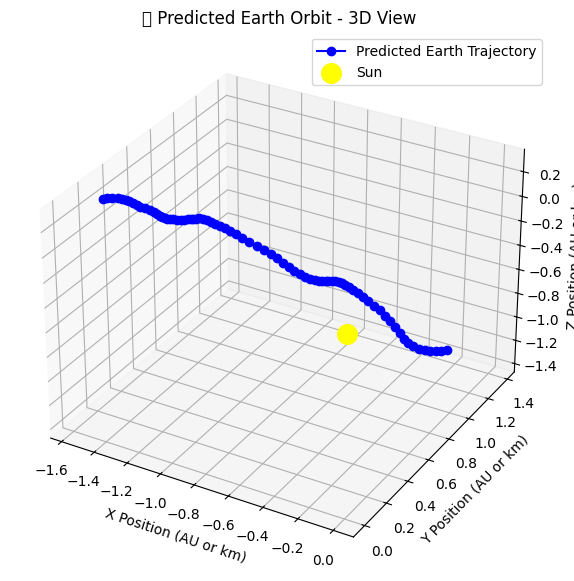

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 📌 Load the predicted positions (Make sure the CSV is generated from previous steps)
pred_df = pd.read_csv("Predictions.csv")

# 📌 Extract X, Y, Z coordinates
x_pred = pred_df["Predicted_X"]
y_pred = pred_df["Predicted_Y"]
z_pred = pred_df["Predicted_Z"]

# 📌 Set up a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 📌 Plot the Earth's predicted orbit
ax.plot(x_pred, y_pred, z_pred, marker='o', linestyle='-', color='b', label="Predicted Earth Trajectory")

# 📌 Mark the Sun at the center (0,0,0)
ax.scatter(0, 0, 0, color='yellow', marker='o', s=200, label="Sun")

# 📌 Labels & Title
ax.set_xlabel("X Position (AU or km)")
ax.set_ylabel("Y Position (AU or km)")
ax.set_zlabel("Z Position (AU or km)")
ax.set_title("🌍 Predicted Earth Orbit - 3D View")

# 📌 Legend & Grid
ax.legend()
ax.grid()

# 📌 Show the 3D plot
plt.show()
